   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


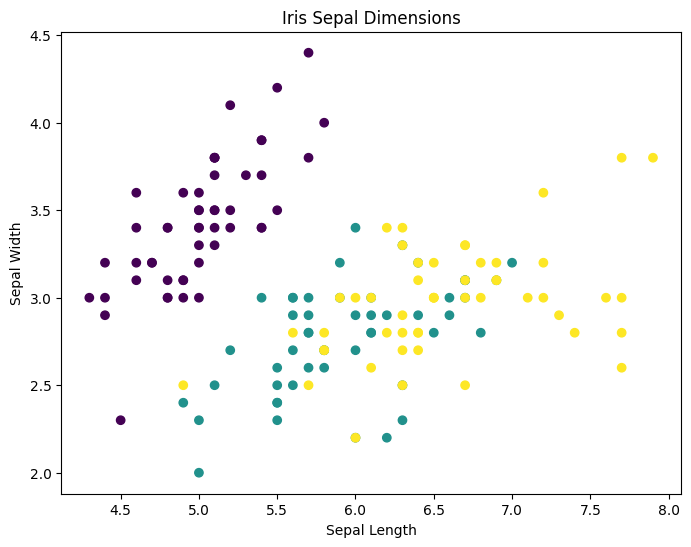

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load a simple dataset (Iris dataset from sklearn)
from sklearn.datasets import load_iris
iris = load_iris()

# Convert the data into a DataFrame for easier handling
data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
data['target'] = iris['target']

# Preview the first few rows of the dataset
print(data.head())

# Plotting some basic data
plt.figure(figsize=(8,6))
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=data['target'], cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Sepal Dimensions')
plt.show()


In [3]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Prepare the data
X = data[['sepal length (cm)', 'sepal width (cm)']]
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [4]:
from sklearn.datasets import load_iris
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
# random_state ensures that we get the same split every time we run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Traing set size : {X_train.shape}")
print(f"Testing set size : {X_test.shape}")

Traing set size : (120, 4)
Testing set size : (30, 4)


In [5]:
# Choosing and Training a Logistic Regression Model
# The max_iter=200 ensures that the optimization process converges
model = LogisticRegression(max_iter=200)

# train model on the training data
model.fit(X_train, y_train)

print("Model Traing complete")

Model Traing complete


In [7]:
# Making predictions
y_pred = model.predict(X_test)

#print first few predictions
print("predicted labels:" ,y_pred[:5])
print("actual labels:" ,y_test.values[:5])

predicted labels: [1 0 2 1 1]
actual labels: [1 0 2 1 1]


In [15]:
# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# generate the confusion matrix
# confusion_matrix() shows how many predictions were true positives,
# true negatives, false positives, and false negatives.
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# generate a classification report
# classification_report() provides precision, recall, and F1-score for each class in the dataset.
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:\n", class_report)


Accuracy: 100.00%
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Breast cancer **dataset**

In [16]:

# Breast cancer dataset
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [17]:
import pandas as pd

# Convert the data into a DataFrame for easier handling
data = pd.DataFrame(data=cancer['data'], columns=cancer['feature_names'])
data['target'] = cancer['target']

print(data.head)

<bound method NDFrame.head of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean conca

In [19]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
y = data['target']

# random_state ensures that we get the same split every time we run the code.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(f"Traing set size : {X_train.shape[0]}")
print(f"Testing set size : {X_test.shape[0]}")

Traing set size : 455
Testing set size : 114


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

model = SVC(random_state=42)
# model = LogisticRegression(max_iter=200

# train model on the training data
model.fit(X_train, y_train)

print("Model Traing complete")

Model Traing complete


In [30]:
y_pred = model.predict(X_test)

print("Predicted labels: ", y_pred[:5])
print("Actual labels: ", y_test.values[:5])

Predicted labels:  [1 0 0 1 1]
Actual labels:  [1 0 0 1 1]


In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 94.74%
Confusion Matrix:
 [[37  6]
 [ 0 71]]


In [32]:
class_report = classification_report(y_test, y_pred, target_names=cancer.target_names)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

   malignant       1.00      0.86      0.93        43
      benign       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

